In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covidstats0.csv")

In [3]:
df.columns

Index(['Date', 'Cases Rate - Total', 'Deaths Rate - Total',
       'Hospitalizations Rate - Total', 'Cases Rate - Age 0-17',
       'Cases Rate - Age 18-29', 'Cases Rate - Age 30-39',
       'Cases Rate - Age 40-49', 'Cases Rate - Age 50-59',
       'Cases Rate - Age 60-69', 'Cases Rate - Age 70-79',
       'Cases Rate -  Age 80+', 'Cases Rate - Female', 'Cases Rate - Male',
       'Cases Rate - Latinx', 'Cases Rate - Asian Non-Latinx',
       'Cases Rate - Black Non-Latinx', 'Cases Rate - White Non-Latinx',
       'Cases Rate - Other Race Non-Latinx', 'Deaths Rate - Age 0-17',
       'Deaths Rate - Age 18-29', 'Deaths Rate - Age 30-39',
       'Deaths Rate - Age 40-49', 'Deaths Rate - Age 50-59',
       'Deaths Rate - Age 60-69', 'Deaths Rate - Age 70-79',
       'Deaths Rate - Age 80+', 'Deaths Rate - Female', 'Deaths Rate - Male',
       'Deaths Rate - Latinx', 'Deaths Rate - Asian Non-Latinx',
       'Deaths Rate - Black Non-Latinx', 'Deaths Rate - White Non-Latinx',
       'Deaths

In [4]:
df.rename(columns={
    "Hospitalizations Rate -  Latinx": "Hospitalizations Rate - Latinx", 
    "Hospitalizations Rate -  Asian Non-Latinx": "Hospitalizations Rate - Asian Non-Latinx",
    "Hospitalizations Rate -  Black Non-Latinx": "Hospitalizations Rate - Black Non-Latinx",
    "Hospitalizations Rate -  White Non-Latinx": "Hospitalizations Rate - White Non-Latinx",
    "Hospitalizations Rate -  Other Race Non-Latinx": "Hospitalizations Rate - Other Race Non-Latinx"
}, inplace=True)

# How do COVID-19 deaths, cases, and hospitalizations compare across race in Chicago ?

Create table that has deaths, cases, and hospitalizations rates as columns and race (Latinx, Asian, Black, White, Other) as rows. Determine each rate by taking the average of all the rates from the yearly data that we have (each row in the original dataframe is a day from 2020-2021)

In [5]:
cats = ["Deaths", "Hospitalizations", "Cases"]
races = ["Latinx", "Asian Non-Latinx", "Black Non-Latinx", "White Non-Latinx", "Other Race Non-Latinx"]
data = {}
for cat in cats:
    data[cat] = []
    for race in races:
        data[cat].append(df[f"{cat} Rate - {race}"].mean())
    
df2 = pd.DataFrame(data=data, columns=cats, index=["Latinx", "Asian", "Black", "White", "Other"])

In [6]:
df2.sort_values("Deaths", ascending=False)

,Deaths,Hospitalizations,Cases
Black,0.696286,2.692286,15.262571
Latinx,0.608857,1.809429,31.263429
Asian,0.366857,0.858286,9.869143
White,0.340286,0.948571,14.257143
Other,0.102286,1.282000,26.222857


As we can see from the extrapolated data above, the historically underprivileged Latinx and Black populations in Chicago had a much higher death, hospitalization, and COVID-19 cases rates than Asian, White, and Other Non-Latinx groups, sometimes doubling or tripling the rate in some metrics (e.g cases)

<AxesSubplot:title={'center':'COVID-19 Deaths(Rate) in Chicago by Race'}, xlabel='Race', ylabel='%'>

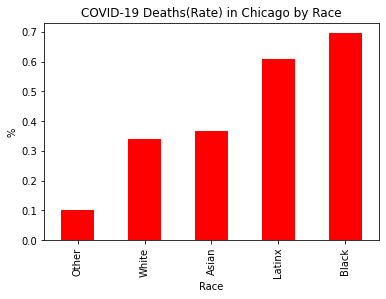

In [7]:
df2.sort_values("Deaths")["Deaths"].plot(kind="bar", title="COVID-19 Deaths(Rate) in Chicago by Race", xlabel="Race", ylabel="%", color="red")

<AxesSubplot:title={'center':'COVID-19 Hospitalization (Rate) in Chicago by Race'}, xlabel='Race', ylabel='%'>

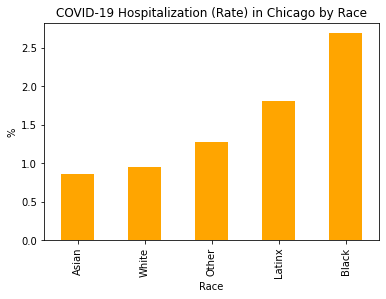

In [8]:
df2.sort_values("Hospitalizations")["Hospitalizations"].plot(kind="bar", title="COVID-19 Hospitalization (Rate) in Chicago by Race", xlabel="Race", ylabel="%", color="orange")

<AxesSubplot:title={'center':'COVID-19 Case (Rate) in Chicago by Race'}>

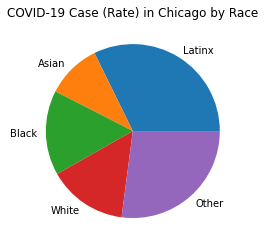

In [9]:
df2["Cases"].plot(kind="pie", title="COVID-19 Case (Rate) in Chicago by Race", ylabel="")

### The Latinx and Black communities of Chicago have greater COVID-19 death, hospitalization, and case rates than White, Asian, and Other Non-Latinx populations.

# How do cases and deaths compare across zip codes according to median income ?

E.g do zip codes with higher median incomes have less cases and deaths ?

In [10]:
zcmi = pd.read_csv("zcmi.csv") #zip code median income for Chicago
zcmi["Median Income"].replace("\$", "", regex=True, inplace=True)
zcmi["Median Income"].replace("\,", "", regex=True, inplace=True)
zcmi["Median Income"] = pd.to_numeric(zcmi["Median Income"])
zcmi.set_index("Zip", inplace=True)
#above we convert all the zip code and median income values to numeric values from objects

In [11]:
zcdf = pd.read_csv("zcdf.csv", thousands=",").dropna() #zip code data frame (cases, tests, and deaths by zip code)
zcdf.rename(columns={"ZIP Code": "Zip"}, inplace=True)
zcdf["Zip"] = pd.to_numeric(zcdf["Zip"]) #if we ever have a series whose dtype is an object, we need to convert that series to some numeric value

In [12]:
zcdf

,Zip,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
10,60603,20,05/10/2020,05/16/2020,1.0,5.0,85.0,425.9,8.0,50,...,4258.9,0.4,0.2,0,0,0.0,0.0,1174,60603-2020-20,POINT (-87.625473 41.880112)
11,60603,21,05/17/2020,05/23/2020,1.0,6.0,85.0,511.1,14.0,64,...,5451.4,0.1,0.2,0,0,0.0,0.0,1174,60603-2020-21,POINT (-87.625473 41.880112)
12,60603,22,05/24/2020,05/30/2020,0.0,6.0,0.0,511.1,7.0,71,...,6047.7,0.0,0.2,0,0,0.0,0.0,1174,60603-2020-22,POINT (-87.625473 41.880112)
13,60603,23,05/31/2020,06/06/2020,0.0,6.0,0.0,511.1,19.0,90,...,7666.1,0.1,0.1,0,0,0.0,0.0,1174,60603-2020-23,POINT (-87.625473 41.880112)
14,60603,24,06/07/2020,06/13/2020,0.0,6.0,0.0,511.1,10.0,100,...,8517.9,0.0,0.1,0,0,0.0,0.0,1174,60603-2020-24,POINT (-87.625473 41.880112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,60610,26,06/21/2020,06/27/2020,26.0,299.0,67.0,766.3,645.0,4243,...,10874.2,0.0,0.1,0,9,0.0,23.1,39019,60610-2020-26,POINT (-87.63581 41.90455)
3115,60620,22,05/24/2020,05/30/2020,53.0,1066.0,78.0,1565.4,892.0,6317,...,9276.6,0.1,0.2,1,66,1.5,96.9,68096,60620-2020-22,POINT (-87.651656 41.740873)
3117,60621,16,04/12/2020,04/18/2020,76.0,219.0,262.0,754.1,168.0,585,...,2014.3,0.4,0.4,3,9,10.3,31.0,29042,60621-2020-16,POINT (-87.638812 41.776931)
3118,60630,35,08/23/2020,08/29/2020,51.0,1162.0,89.0,2026.4,991.0,14523,...,25326.1,0.1,0.1,1,63,1.7,109.9,57344,60630-2020-35,POINT (-87.759611 41.971261)


For each zip code in our zip code median income data frame, we need to sum up the weekly cumulative totals for the past 52 weeks for cases and deaths within that zip code. Thus, our new df will be
zip code, median income, deaths, cases

In [13]:
data = []
for zipcode in list(zcmi.index):
    mi = zcmi.loc[zipcode]["Median Income"]    
    cases = zcdf[zcdf["Zip"] == zipcode]["Cases - Weekly"].sum()
    deaths = zcdf[zcdf["Zip"] == zipcode]["Deaths - Weekly"].sum()
    data.append([mi, cases, deaths])

In [14]:
df3 = pd.DataFrame(data=data, columns=["Median Income", "Cases", "Deaths"])
df3.set_index("Median Income", inplace=True)
df3

,Cases,Deaths
Median Income,,
100377.0,263.0,3
77374.0,903.0,11
69889.0,1934.0,14
68324.0,4786.0,89
61815.0,64.0,0
59849.0,3137.0,33
58232.0,2375.0,66
56151.0,1678.0,11
55647.0,4482.0,46


Now we need to plot the median income vs cases, and median income vs deaths. 

<AxesSubplot:title={'center':'# of COVID-19 Cases vs Median Income in Chicago'}, xlabel='Median Income', ylabel='# of people'>

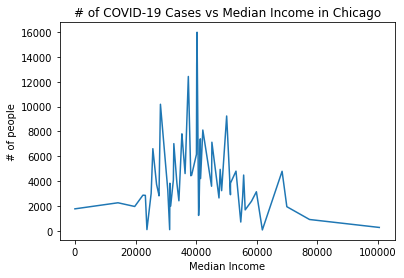

In [15]:
df3["Cases"].plot(ylabel="# of people", title="# of COVID-19 Cases vs Median Income in Chicago")

We can observe in the above graph that there are a greater amount of cases within the middle income brackets of $30000-$60000. As income increases past $50000, the number of cases decreases.

<AxesSubplot:title={'center':'# of COVID-19 Deaths vs Median Income in Chicago'}, xlabel='Median Income', ylabel='# of people'>

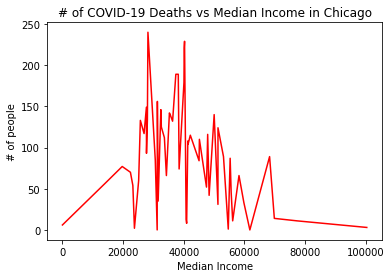

In [16]:
df3["Deaths"].plot(ylabel="# of people", title="# of COVID-19 Deaths vs Median Income in Chicago", color="red")

Again, we can see that the number of deaths generally decreases as the median income increases past $40,000.

## Vaccinations

In [17]:
vcdf = pd.read_csv("vcdf.csv")
vcdf

,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Total Doses - Daily - Age 0-17,...,Vaccine Series Completed - Daily - Unknown Age,Vaccine Series Completed - Daily - Female,Vaccine Series Completed - Daily - Male,Vaccine Series Completed - Daily - Unknown Gender,Vaccine Series Completed - Daily - Latinx,Vaccine Series Completed - Daily - Asian Non-Latinx,Vaccine Series Completed - Daily - Black Non-Latinx,Vaccine Series Completed - Daily - White Non-Latinx,Vaccine Series Completed - Daily - Other Race Non-Latinx,Vaccine Series Completed - Daily - Unknown Race/Ethnicity
0,12/15/2020,5,5,5,5,0.000,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
1,12/16/2020,150,155,150,155,0.000,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
2,12/17/2020,1995,2150,1995,2150,0.001,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
3,12/18/2020,5671,7821,5671,7821,0.003,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
4,12/19/2020,3429,11250,3429,11250,0.004,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,03/03/2021,17797,579028,8562,384482,0.143,9235,194546,0.072,20,...,0,5306,3822,107,2167,548,2014,3801,262,443
79,03/04/2021,17233,596261,9558,394040,0.146,7675,202221,0.075,11,...,0,4433,3195,47,1933,434,1654,3083,170,401
80,03/05/2021,17585,613846,10588,404628,0.150,6997,209218,0.078,16,...,0,4079,2863,55,1864,395,1484,2691,167,396
81,03/06/2021,9770,623616,5110,409738,0.152,4660,213878,0.079,25,...,0,2867,1779,14,1459,251,949,1611,106,284


In [18]:
cats = ["Vaccine Series Completed - Daily - Latinx", "Vaccine Series Completed - Daily - Asian Non-Latinx", "Vaccine Series Completed - Daily - Black Non-Latinx", "Vaccine Series Completed - Daily - White Non-Latinx", "Vaccine Series Completed - Daily - Other Race Non-Latinx"]
vcrdf = vcdf[["Date"] + cats]
newcolnames = ["Latinx", "Asian", "Black", "White", "Other"]
newcolnamesmap = {}
for i in range(0, len(cats)):
    newcolnamesmap[cats[i]] = newcolnames[i]
vcrdf = vcrdf.rename(columns=newcolnamesmap)

In [19]:
vcrdf

,Date,Latinx,Asian,Black,White,Other
0,12/15/2020,0,0,0,0,0
1,12/16/2020,0,0,0,0,0
2,12/17/2020,0,0,0,0,0
3,12/18/2020,0,0,0,0,0
4,12/19/2020,0,0,0,0,0
...,...,...,...,...,...,...
78,03/03/2021,2167,548,2014,3801,262
79,03/04/2021,1933,434,1654,3083,170
80,03/05/2021,1864,395,1484,2691,167
81,03/06/2021,1459,251,949,1611,106


The above table tells us how many people from each major race (Latinx, Asian, Black, White, and Other) completed their COVID-19 vaccination series each day from December 15th, 2020 to March 07th, 2021. However, this data is actually not that useful because it provides absolute values, rather than a rate of how many people from that population completed their vacinnation series. 

Because we don't get relative numbers from the vaccinations by race/ethnicity in the previous dataset, we'll use another dataset that will tell us how many people were vaccinated by zip code, as a percentage of the population within that zip code. We can combine this with our median income data to determine how vaccination series completion rates relate to income levels.

<AxesSubplot:>

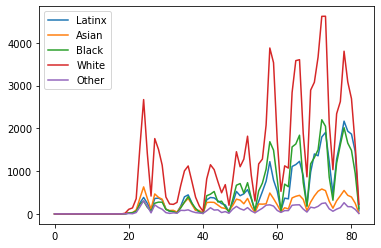

In [20]:
vcrdf.plot()

In [21]:
vczp = pd.read_csv("vczp.csv") #vacinnations by zip code
vczp.dropna(inplace=True)
vczp["Zip Code"] = pd.to_numeric(vczp["Zip Code"])


In [22]:
vczptd = vczp[vczp["Date"] == '03/07/2021'] #vaccines administrated to date by zip code
vczptd

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population,ZIP Code Location,Row_ID
1089,60601,03/07/2021,5,4370,4,2671,0.177,1,1699,0.113,15083,POINT (-87.622844 41.886262),60601-20210307
1090,60606,03/07/2021,1,1145,1,702,0.214,0,443,0.135,3287,POINT (-87.63676 41.882634),60606-20210307
1091,60611,03/07/2021,10,16952,7,9755,0.294,3,7197,0.217,33224,POINT (-87.620291 41.894734),60611-20210307
1092,60666,03/07/2021,0,37,0,24,0.000,0,13,0.000,0,POINT (-87.896371 41.979511),60666-20210307
1093,60645,03/07/2021,157,12525,99,8266,0.175,58,4259,0.090,47270,POINT (-87.695049 42.008927),60645-20210307
1094,60625,03/07/2021,61,18527,49,12176,0.153,12,6351,0.080,79444,POINT (-87.701816 41.971155),60625-20210307
1095,60640,03/07/2021,39,21666,32,13980,0.202,7,7686,0.111,69363,POINT (-87.662232 41.971888),60640-20210307
1096,60626,03/07/2021,31,12208,26,7886,0.156,5,4322,0.086,50544,POINT (-87.669834 42.009469),60626-20210307
1097,60657,03/07/2021,72,22076,53,13610,0.192,19,8466,0.119,70958,POINT (-87.658216 41.939715),60657-20210307
1098,60615,03/07/2021,9,12362,4,7308,0.180,5,5054,0.125,40590,POINT (-87.602725 41.801993),60615-20210307


In [23]:
mi = []
for zipcode in vczptd["Zip Code"]:
    if zipcode in zcmi.index.values:
        mi.append(zcmi.loc[zipcode]["Median Income"])
    else:
        mi.append(None)

In [24]:
df4 = pd.DataFrame({'Zip': vczptd["Zip Code"], 
                    "Vaccinated": vczptd["Vaccine Series Completed  - Percent Population"], 
                    "Income": mi})
df4.dropna(inplace=True)
df4.sort_values("Income", ascending=False)

,Zip,Vaccinated,Income
1090,60606,0.135,100377.0
1089,60601,0.113,77374.0
1091,60611,0.217,69889.0
1111,60614,0.114,68324.0
1113,60603,0.271,61815.0
1131,60655,0.138,59849.0
1135,60646,0.119,58232.0
1149,60605,0.149,56151.0
1097,60657,0.119,55647.0
1102,60631,0.123,55316.0


Each row in the above dataframe represents a major area in Chicago, denoted by its zip code, and each of these areas is described by the percentage of people in that area that completed their COVID-19 vaccination series, and the median income within that area.

In [25]:
m, b = np.polyfit(df4["Income"], df4["Vaccinated"], 1) #get line of best fit for income vs vaccinated

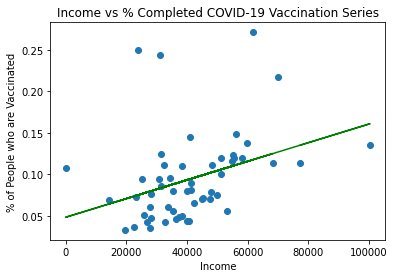

In [29]:
plt.scatter(df4["Income"], df4["Vaccinated"]) #plot income vs % vaccinated
plt.title("Income vs % Completed COVID-19 Vaccination Series")
plt.xlabel("Income")
plt.ylabel("% of People who are Vaccinated")
plt.plot(df4["Income"], m*df4["Income"]+b, color="green")

### We can observe in the above graph that as income increases within the Chicago city limits, the likelihood of having completing the COVID-19 vaccination series increases as well. ***So, the greater your annual income, the more likely you are to receive or have received the COVID-19 vaccine***.